## Machine Learning Models: Prediction of Car Value

Criar modelos de regressao e logistica linear para prever o preco dos carros

fonte dos dados: https://courses.cognitiveclass.ai/courses/course-v1:CognitiveClass+DA0101EN+2017/course/

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression #modelo regressao linear
from sklearn.model_selection import train_test_split #separar os dados em treino e teste
from sklearn import metrics #metricas para avaliar os modelos (R2 and MSE)
from sklearn.linear_model import LogisticRegression #modelo regressao logistica

In [3]:
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [4]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length',
       'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price',
       'city-L/100km', 'horsepower-binned', 'diesel', 'gas'],
      dtype='object')

In [5]:
x = df[['symboling', 'normalized-losses', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length',
       'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg',
       'city-L/100km', 'horsepower-binned', 'diesel', 'gas']].values
y = df['price'].values

In [6]:
correlation = df[['symboling', 'normalized-losses', 'make', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length',
       'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price',
       'city-L/100km', 'horsepower-binned', 'diesel', 'gas']].corr()
correlation

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008245,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.196735,0.196735
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055563,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999,0.238567,-0.101546,0.101546
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158502,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.307237,-0.307237
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.124139,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.211187,-0.211187
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188829,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.244356,-0.244356
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.062704,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.281578,-0.281578
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167562,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.221046,-0.221046
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.209523,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.070779,-0.070779
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.054458,-0.054458
stroke,-0.008245,0.055563,0.158502,0.124139,0.188829,-0.062704,0.167562,0.209523,-0.055390,1.000000,0.187923,0.098462,-0.065713,-0.034696,-0.035201,0.082310,0.037300,0.241303,-0.241303


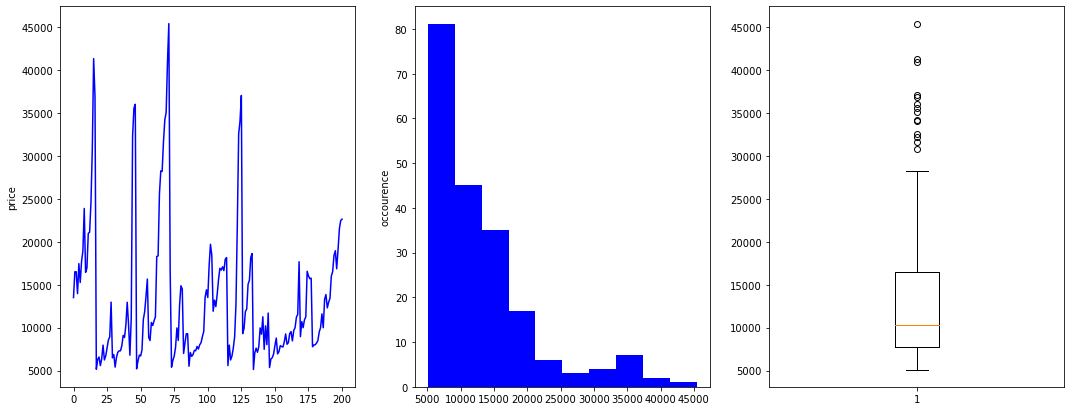

In [7]:
plt.figure(figsize=(18,7))

ax = plt.subplot(1,3,1)
ax.plot(y,color='b')
plt.ylabel('price')

ax = plt.subplot(1,3,2)
ax.hist(y, color='b')
plt.ylabel('occourence')

ax = plt.subplot(1,3,3)
ax.boxplot(y)
plt.show()

In [8]:
higher = correlation.query('price > 0.7 or price <-0.7') #usar colunas com maiores correlacoes como variaveis preditoras
higher.index

Index(['width', 'curb-weight', 'engine-size', 'horsepower', 'highway-mpg',
       'price', 'city-L/100km'],
      dtype='object')

### Linear regression model

In [9]:
data_x = df[higher.index].values #selecionar colunas com maiores correlacao e capturar seus valores
data_y = df['price'].values #variavel target

In [10]:
x_train, x_test, y_train, y_test = train_test_split(data_x,data_y, test_size=0.3)

In [11]:
model_linear = LinearRegression() #instanciar funcao
model_linear

LinearRegression()

In [12]:
model_linear.fit(x_train, y_train)

LinearRegression()

In [13]:
preds_test = model_linear.predict(x_test)

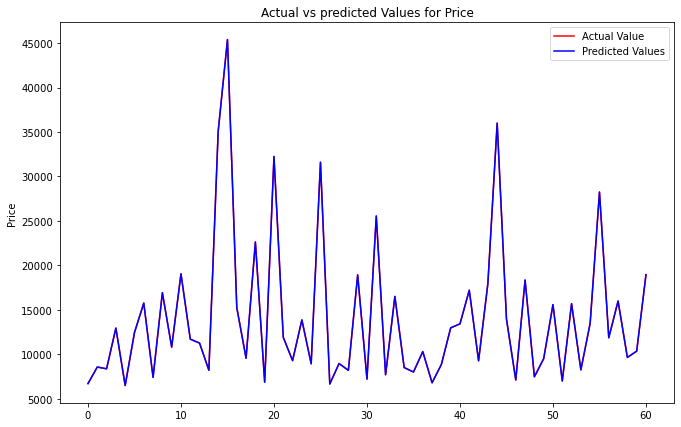

In [14]:
plt.figure(figsize=(11, 7))
plt.plot(y_test, color="r", label="Actual Value")
plt.plot(preds_test, color="b", label="Predicted Values")


plt.title('Actual vs predicted Values for Price')
plt.ylabel('Price')
plt.legend()
plt.show()

In [15]:
print('MSE:',sklearn.metrics.mean_squared_error(y_test, preds_test))
print('R2_score:',sklearn.metrics.r2_score(y_test, preds_test))
print('Usar colunas com maiores correlacoes aumenta a acuracia do modelo de regressao linear\nNOTA: Usar dados de treino in-sample nao torna o modelo robusto, e preciso usar dados out-sample')

MSE: 1.848599505338999e-21
R2_score: 1.0
Usar colunas com maiores correlacoes aumenta a acuracia do modelo de regressao linear
NOTA: Usar dados de treino in-sample nao torna o modelo robusto, e preciso usar dados out-sample


### Logistic regression model (regression or classification?)

In [21]:
lr = LogisticRegression(C = 0.7, random_state = 42, max_iter = 10000000)

In [22]:
lr = LogisticRegression().fit(x_train, y_train.ravel())

C:\Users\010823631\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Regressao logistica e usada para classificacao, normalmente para categorizacao binaria. Isso justifica esse erro acima

In [23]:
preds_test = lr.predict(x_test)

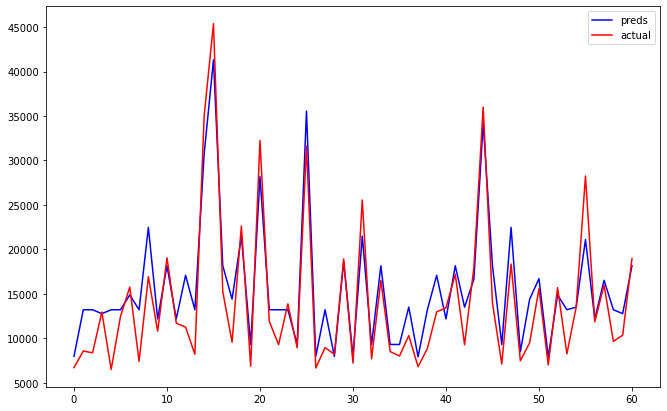

In [24]:
plt.figure(figsize=(11,7))
plt.plot(preds_test,color='b',label='preds')
plt.plot(y_test,color='r',label='actual')
plt.legend()

In [25]:
print('MSE:',sklearn.metrics.mean_squared_error(y_test, preds_test))
print('R2_score:',sklearn.metrics.r2_score(y_test, preds_test))
print('O modelo de regressao logistica nao representa tao bem os dados, portanto tendo uma acuracia inferior')

MSE: 10225997.918032788
R2_score: 0.8487904646153979
O modelo de regressao logistica nao representa tao bem os dados, portanto tendo uma acuracia inferior
